Somatic cells
E10.5, E11.5, E12.5,
E13.5, E16.5, and P6
(Stévant et al. 2019)

Dataset URL:
https://www.ncbi.nlm.nih.gov/
GEO: GSE119766.

In [1]:
library(dplyr)
library(Seurat)
library(Matrix)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [2]:
count_dataframe <- read.table('data/GSE119766_XX_NR5A1-eGFP_single-cell_fetal_gonads.txt', sep="\t", header=TRUE)

In [3]:
head(count_dataframe)


,X,X20140317_C02_150331_2,X20140317_C06_150331_2,X20140317_C07_150331_4,X20140317_C08_150331_1,X20140317_C10_150331_4,X20140317_C12_150331_4,X20140317_C16_150331_6,X20140317_C17_150331_6,X20140317_C18_150331_6,⋯,X20160118_C80_170330_6,X20160118_C81_170330_6,X20160118_C82_170330_7,X20160118_C83_170330_7,X20160118_C84_170330_7,X20160118_C86_170330_7,X20160118_C87_170330_7,X20160118_C88_170330_8,X20160118_C93_170330_8,X20160118_C95_170330_8
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,eGFP,931.18678,792.8470,154.7311965,5729.235763,9161.75487,11913.87022,4197.61881,15.54116,2509.16944,⋯,477.3615638,361.1961075,3197.1863220,89.7856,1243.163,198.3324367,1074.304,19.28552,418.6497919,240.0396
2,Gnai3,243.48095,823.0425,0.3270241,5.205166,37.02973,99.42499,11.08926,20.49604,25.61872,⋯,553.7525616,0.2070203,629.1001311,476.7409,0.000,1.4531408,0.000,0.00000,0.5350047,0.0000
3,Pbsn,0.00000,0.0000,0.0000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,0.0000000,0.0000000,0.0000000,0.0000,0.000,0.0000000,0.000,0.00000,0.0000000,0.0000
4,Cdc45,0.00000,0.0000,0.0000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,0.0000000,0.0000000,0.0000000,0.0000,0.000,0.0000000,0.000,0.00000,0.0000000,0.0000
5,H19,13.41027,783.0962,194.9566786,1108.673454,590.92700,530.59988,75.34259,786.08665,253.66417,⋯,0.1420228,0.2846965,0.0000000,0.0000,0.000,0.2220417,0.000,0.00000,0.0000000,0.0000
6,Scml2,0.00000,0.0000,0.0000000,8.489553,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,0.0000000,0.0000000,0.3890021,0.0000,0.000,0.0000000,0.000,0.00000,15.2154680,0.0000


In [4]:
row.names(count_dataframe) <- make.unique(count_dataframe$X)

In [5]:
count_dataframe <- count_dataframe[,-1]
head(count_dataframe)

,X20140317_C02_150331_2,X20140317_C06_150331_2,X20140317_C07_150331_4,X20140317_C08_150331_1,X20140317_C10_150331_4,X20140317_C12_150331_4,X20140317_C16_150331_6,X20140317_C17_150331_6,X20140317_C18_150331_6,X20140317_C20_150331_7,⋯,X20160118_C80_170330_6,X20160118_C81_170330_6,X20160118_C82_170330_7,X20160118_C83_170330_7,X20160118_C84_170330_7,X20160118_C86_170330_7,X20160118_C87_170330_7,X20160118_C88_170330_8,X20160118_C93_170330_8,X20160118_C95_170330_8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eGFP,931.18678,792.8470,154.7311965,5729.235763,9161.75487,11913.87022,4197.61881,15.54116,2509.16944,8190.0406420,⋯,477.3615638,361.1961075,3197.1863220,89.7856,1243.163,198.3324367,1074.304,19.28552,418.6497919,240.0396
Gnai3,243.48095,823.0425,0.3270241,5.205166,37.02973,99.42499,11.08926,20.49604,25.61872,0.1127875,⋯,553.7525616,0.2070203,629.1001311,476.7409,0.000,1.4531408,0.000,0.00000,0.5350047,0.0000
Pbsn,0.00000,0.0000,0.0000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000,0.000,0.0000000,0.000,0.00000,0.0000000,0.0000
Cdc45,0.00000,0.0000,0.0000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000,0.000,0.0000000,0.000,0.00000,0.0000000,0.0000
H19,13.41027,783.0962,194.9566786,1108.673454,590.92700,530.59988,75.34259,786.08665,253.66417,81.2758869,⋯,0.1420228,0.2846965,0.0000000,0.0000,0.000,0.2220417,0.000,0.00000,0.0000000,0.0000
Scml2,0.00000,0.0000,0.0000000,8.489553,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000000,⋯,0.0000000,0.0000000,0.3890021,0.0000,0.000,0.0000000,0.000,0.00000,15.2154680,0.0000


In [6]:
#prot_coding  <- read.table('../prot_coding.csv', sep=",", header=TRUE)


In [7]:
#count_dataframe <- count_dataframe[row.names(count_dataframe) %in% prot_coding$x,]

In [8]:
#count_dataframe <- count_dataframe[ co prot_coding$x ,]
#head(count_dataframe)

In [9]:
count_dataframe <- count_dataframe[-1,]

In [10]:
cells = as.data.frame( colnames(count_dataframe))
dim(cells)

[1] 663   1

In [11]:
metaData <- read.table('data/metaData.csv', sep=",", header=TRUE)



In [12]:
head(metaData)
dim(metaData)

,X,cell_ontology_class,subtissue,mouse.sex,mouse.id,mouse.dev,plate.barcode,NfixE
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
1,20140317_C02_150331_2,E12.5,ovary,female,20140317,E12.5,20140317_C02_150331_2,0.00000
2,20140317_C06_150331_2,E12.5,ovary,female,20140317,E12.5,20140317_C06_150331_2,0.00000
3,20140317_C07_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C07_150331_4,12.77027
4,20140317_C08_150331_1,E12.5,ovary,female,20140317,E12.5,20140317_C08_150331_1,0.00000
5,20140317_C10_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C10_150331_4,0.00000
6,20140317_C12_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C12_150331_4,0.00000


[1] 663   8

In [13]:
metaData$X <- sub("^", "X", metaData$X )
head(metaData)

,X,cell_ontology_class,subtissue,mouse.sex,mouse.id,mouse.dev,plate.barcode,NfixE
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
1,X20140317_C02_150331_2,E12.5,ovary,female,20140317,E12.5,20140317_C02_150331_2,0.00000
2,X20140317_C06_150331_2,E12.5,ovary,female,20140317,E12.5,20140317_C06_150331_2,0.00000
3,X20140317_C07_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C07_150331_4,12.77027
4,X20140317_C08_150331_1,E12.5,ovary,female,20140317,E12.5,20140317_C08_150331_1,0.00000
5,X20140317_C10_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C10_150331_4,0.00000
6,X20140317_C12_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C12_150331_4,0.00000


In [14]:
row.names(metaData) <- metaData$X
metaData = metaData[,-1]
head(metaData)

,cell_ontology_class,subtissue,mouse.sex,mouse.id,mouse.dev,plate.barcode,NfixE
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
X20140317_C02_150331_2,E12.5,ovary,female,20140317,E12.5,20140317_C02_150331_2,0.00000
X20140317_C06_150331_2,E12.5,ovary,female,20140317,E12.5,20140317_C06_150331_2,0.00000
X20140317_C07_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C07_150331_4,12.77027
X20140317_C08_150331_1,E12.5,ovary,female,20140317,E12.5,20140317_C08_150331_1,0.00000
X20140317_C10_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C10_150331_4,0.00000
X20140317_C12_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C12_150331_4,0.00000


In [15]:
colnames(metaData) = c("Sample","Tissue","Sex","Mouse","mouse.dev","plate.barcode","NfixE")
head(metaData)

,Sample,Tissue,Sex,Mouse,mouse.dev,plate.barcode,NfixE
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
X20140317_C02_150331_2,E12.5,ovary,female,20140317,E12.5,20140317_C02_150331_2,0.00000
X20140317_C06_150331_2,E12.5,ovary,female,20140317,E12.5,20140317_C06_150331_2,0.00000
X20140317_C07_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C07_150331_4,12.77027
X20140317_C08_150331_1,E12.5,ovary,female,20140317,E12.5,20140317_C08_150331_1,0.00000
X20140317_C10_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C10_150331_4,0.00000
X20140317_C12_150331_4,E12.5,ovary,female,20140317,E12.5,20140317_C12_150331_4,0.00000


In [16]:
#minimumCellsExprGene = as.integer( length(metaData$Sample)*0.01)

pbmc <- CreateSeuratObject(counts = count_dataframe, project = "sf1ovary"
                           ,meta.data = metaData)

In [17]:
minimumCellsExprGene = as.integer( length(cells$V1)*0.01)
  
pbmc <- CreateSeuratObject(counts = count_dataframe,  min.cells = minimumCellsExprGene
                             , min.features = 10, meta.data = metaData)

In [18]:
pbmc

An object of class Seurat 
43346 features across 663 samples within 1 assay 
Active assay: RNA (43346 features, 0 variable features)

In [19]:
pbmc <- NormalizeData(pbmc, normalization.method = "CLR", scale.factor = 10000)
#pbmc <- ScaleData(pbmc, verbose = FALSE)
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Normalizing across features

Centering and scaling data matrix



In [20]:
pbmc

An object of class Seurat 
43346 features across 663 samples within 1 assay 
Active assay: RNA (43346 features, 0 variable features)

In [21]:
head(pbmc@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,Sample,Tissue,Sex,Mouse,mouse.dev,plate.barcode,NfixE
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
X20140317_C02_150331_2,X20140317,458200.2,7088,E12.5,ovary,female,20140317,E12.5,20140317_C02_150331_2,0.00000
X20140317_C06_150331_2,X20140317,434337.4,5430,E12.5,ovary,female,20140317,E12.5,20140317_C06_150331_2,0.00000
X20140317_C07_150331_4,X20140317,394444.6,5942,E12.5,ovary,female,20140317,E12.5,20140317_C07_150331_4,12.77027
X20140317_C08_150331_1,X20140317,510292.7,5539,E12.5,ovary,female,20140317,E12.5,20140317_C08_150331_1,0.00000
X20140317_C10_150331_4,X20140317,437311.9,6584,E12.5,ovary,female,20140317,E12.5,20140317_C10_150331_4,0.00000
X20140317_C12_150331_4,X20140317,430698.0,6726,E12.5,ovary,female,20140317,E12.5,20140317_C12_150331_4,0.00000


In [22]:
# Run the standard workflow for visualization and clustering

pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

In [23]:
pbmc <- RunPCA(pbmc, npcs = 30, verbose = FALSE)
pbmc <- RunUMAP(pbmc, reduction = "pca", dims = 1:30)
pbmc <- FindNeighbors(pbmc, reduction = "pca", dims = 1:30)
pbmc <- FindClusters(pbmc, resolution = 0.9)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:38:19 UMAP embedding parameters a = 0.9922 b = 1.112

13:38:19 Read 663 rows and found 30 numeric columns

13:38:19 Using Annoy for neighbor search, n_neighbors = 30

13:38:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:38:19 Writing NN index file to temp file /var/folders/9q/bcmy70lj3f7_0km479f7zckh0000gp/T//RtmpQ0wqBo/file85b8f4978d2

13:38:19 Searching Annoy index using 1 thread, search_k = 3000

13:38:19 Annoy recall = 100%

13:38:20 Commencing smooth kNN distance calibratio

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 663
Number of edges: 26041

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7289
Number of communities: 8
Elapsed time: 0 seconds


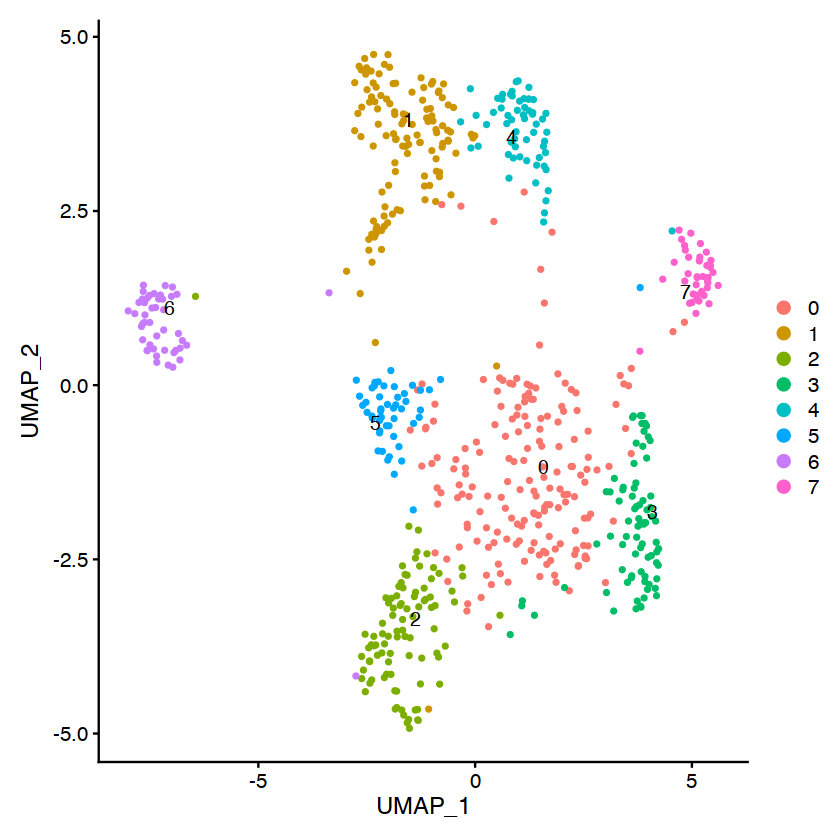

In [24]:
DimPlot(pbmc, reduction = "umap", label = TRUE, repel = TRUE)

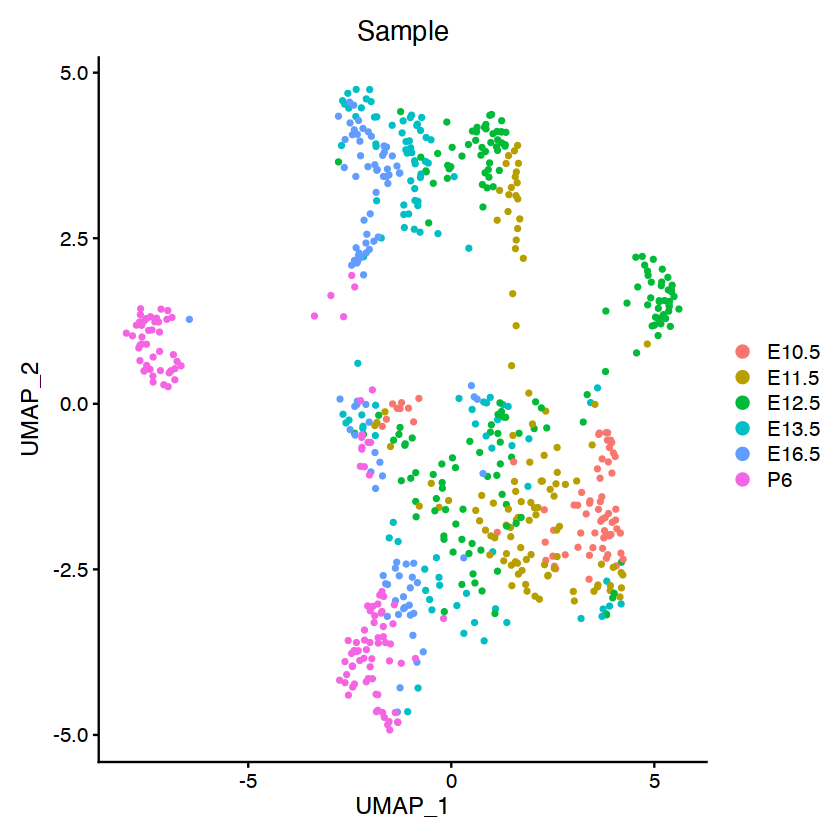

In [25]:
DimPlot(pbmc, reduction = "umap", group.by = "Sample")

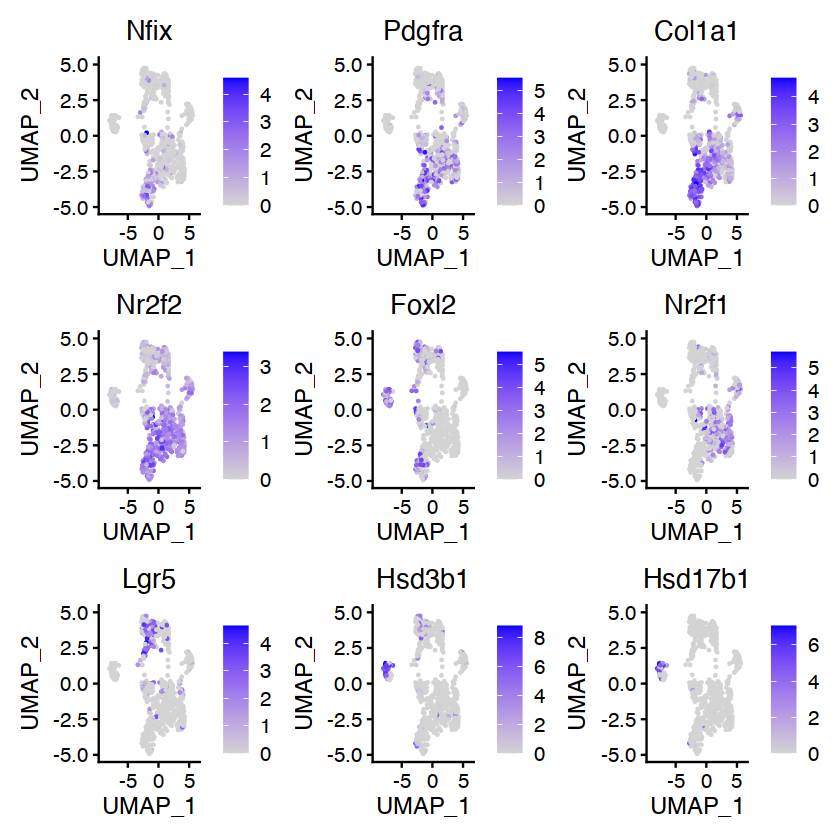

In [28]:
#Markers
FeaturePlot(pbmc, features = c("Nfix","Pdgfra","Col1a1","Nr2f2","Foxl2","Nr2f1","Lgr5",'Hsd3b1','Hsd17b1'), pt.size =0.3)

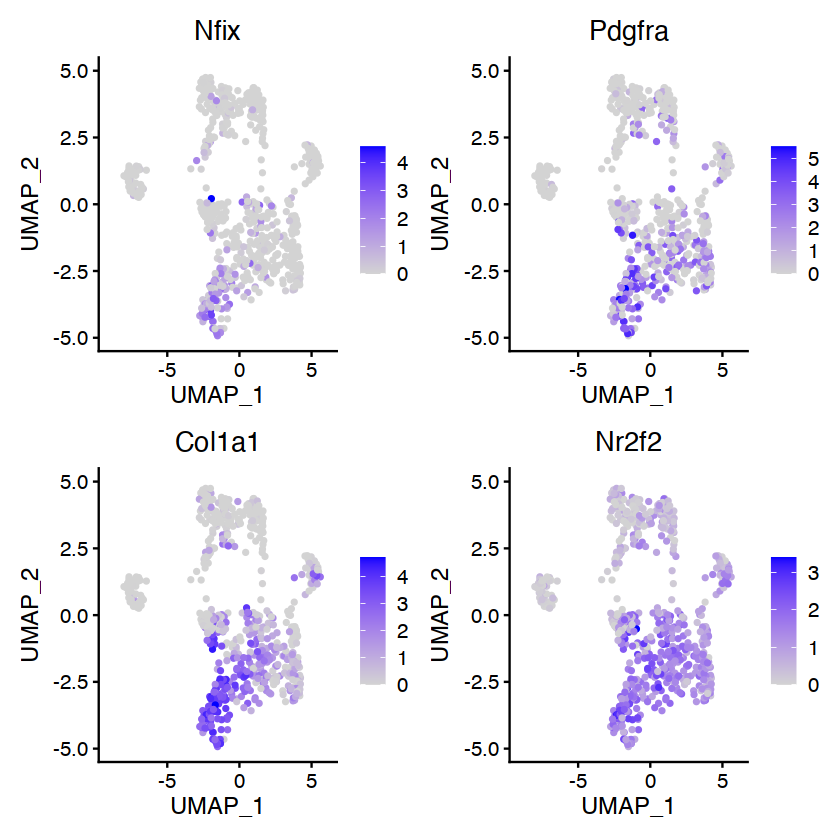

In [29]:
#Mesenchyme
FeaturePlot(pbmc, features = c("Nfix","Pdgfra","Col1a1","Nr2f2"))

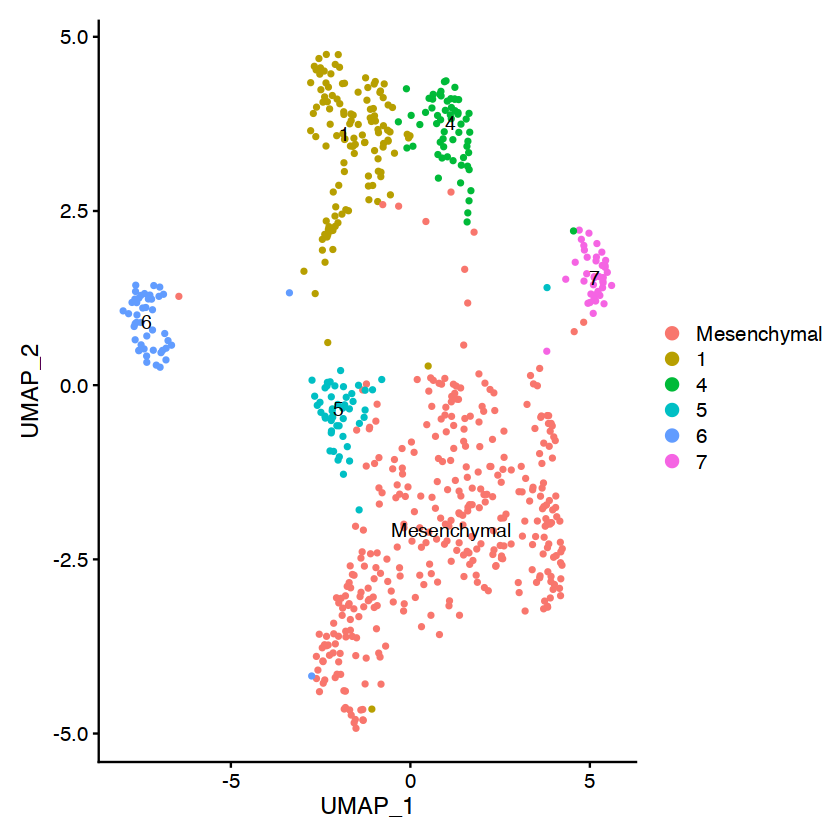

In [30]:
pbmc <- RenameIdents(pbmc, '0' = 'Mesenchymal', '3' = 'Mesenchymal',
                                               '2' = 'Mesenchymal')
DimPlot(pbmc, reduction = "umap", label =TRUE)

In [31]:
save(pbmc, file = "data/sf1-Mesenchymal-all.Rdata")

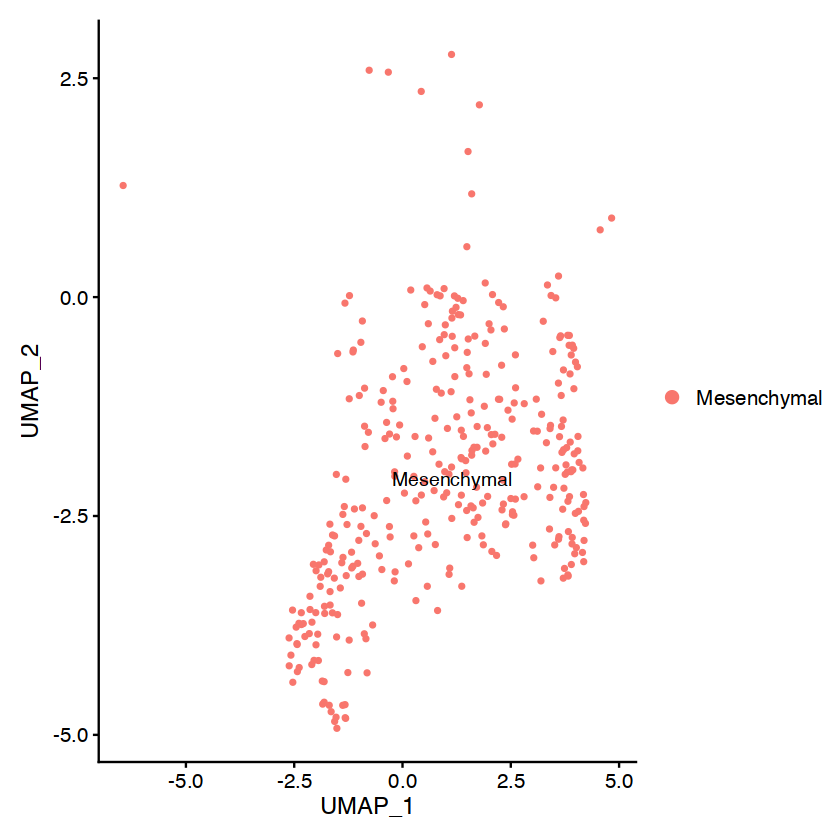

In [32]:
pbmc = subset(x = pbmc, idents = c("Mesenchymal"))
DimPlot(pbmc, reduction = "umap", label =TRUE)

In [43]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
pbmc <- RunPCA(pbmc, npcs = 20, verbose = FALSE)
pbmc <- RunUMAP(pbmc, reduction = "pca", dims = 1:20)
pbmc <- FindNeighbors(pbmc, reduction = "pca", dims = 1:20)
pbmc <- FindClusters(pbmc, resolution = 0.9)

14:33:13 UMAP embedding parameters a = 0.9922 b = 1.112

14:33:13 Read 349 rows and found 20 numeric columns

14:33:13 Using Annoy for neighbor search, n_neighbors = 30

14:33:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:33:13 Writing NN index file to temp file /var/folders/9q/bcmy70lj3f7_0km479f7zckh0000gp/T//RtmpQ0wqBo/file85b83a1a2f34

14:33:13 Searching Annoy index using 1 thread, search_k = 3000

14:33:13 Annoy recall = 100%

14:33:14 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:33:14 Initializing from normalized Laplacian + noise (using irlba)

14:33:14 Commencing optimization for 500 epochs, with 13102 positive edges

14:33:15 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 349
Number of edges: 14267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5649
Number of communities: 5
Elapsed time: 0 seconds


In [ ]:
DimPlot(pbmc, reduction = "umap",  repel = TRUE)

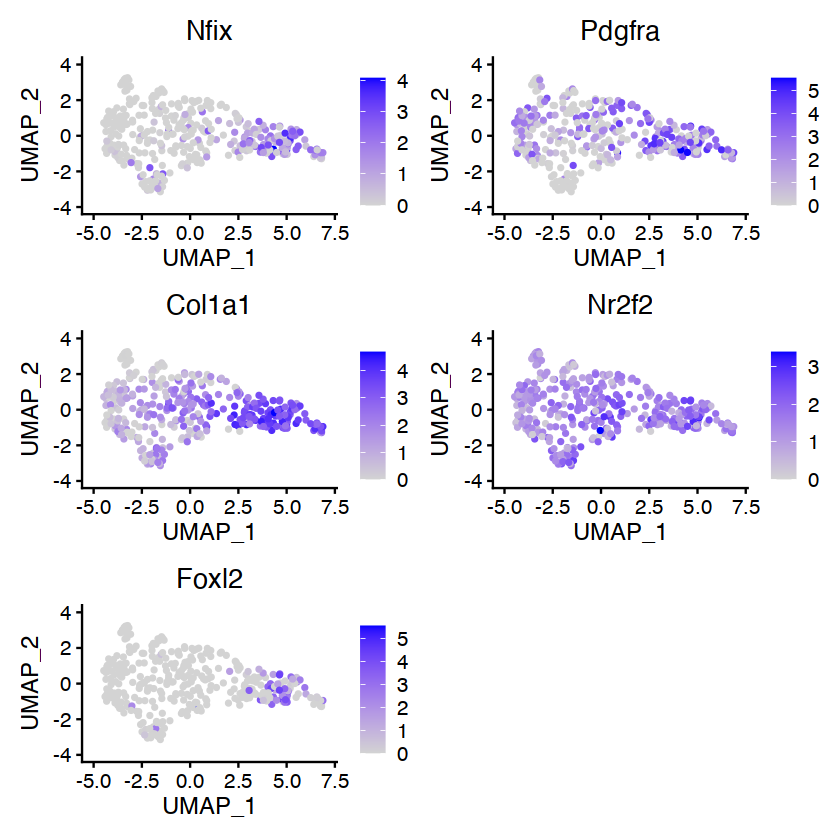

In [48]:
#Mesenchyme
FeaturePlot(pbmc, features = c("Nfix","Pdgfra","Col1a1","Nr2f2","Foxl2"))

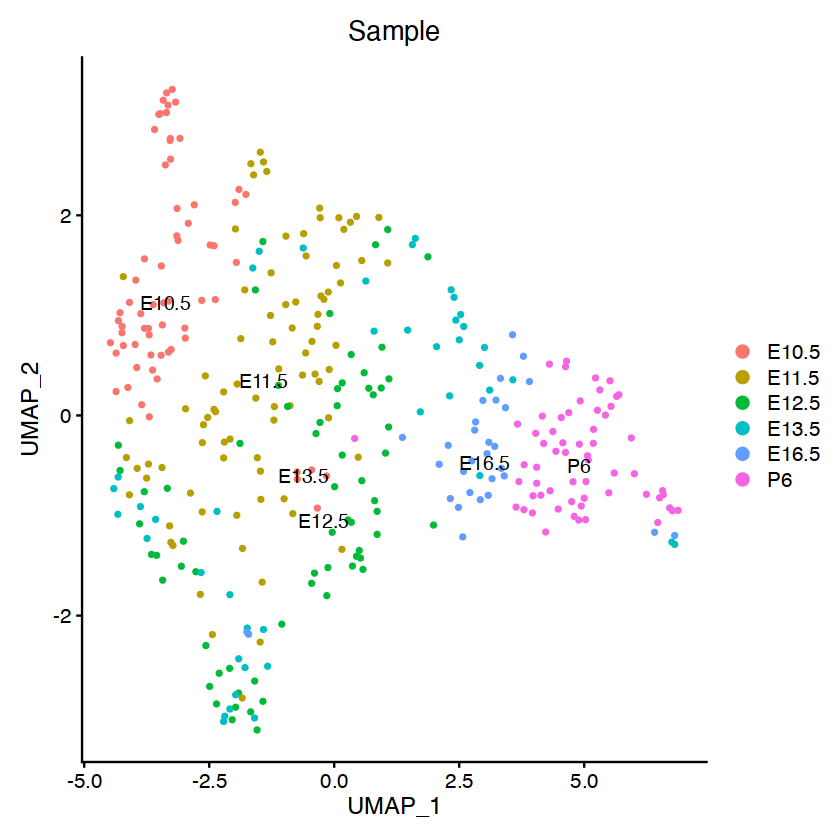

In [46]:
DimPlot(pbmc, reduction = "umap", group.by = "Sample", label = TRUE)

In [47]:
save(pbmc, file = "data/sf1-Mesenchymal-all.Rdata")

<h1>Trayectory<h1>

In [49]:
library(tidyverse)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [50]:
library(monocle3)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")'

In [52]:
library(SeuratWrappers)
library(ggplot2)
library(ggridges)

In [53]:
cds <- as.cell_data_set(pbmc)

Warning message:
“Monocle 3 trajectories require cluster partitions, which Seurat does not calculate. Please run 'cluster_cells' on your cell_data_set object”


In [54]:
head(colData(cds))

DataFrame with 6 rows and 16 columns
                       orig.ident nCount_RNA nFeature_RNA      Sample
                         <factor>  <numeric>    <integer> <character>
X20140317_C02_150331_2  X20140317     458200         7088       E12.5
X20140317_C07_150331_4  X20140317     394445         5942       E12.5
X20140317_C17_150331_6  X20140317     334515         2106       E12.5
X20140317_C23_150331_1  X20140317     488761         6430       E12.5
X20140317_C24_150331_1  X20140317     375048         5739       E12.5
X20140317_C25_150331_2  X20140317     421330         5523       E12.5
                            Tissue         Sex     Mouse   mouse.dev
                       <character> <character> <integer> <character>
X20140317_C02_150331_2       ovary      female  20140317       E12.5
X20140317_C07_150331_4       ovary      female  20140317       E12.5
X20140317_C17_150331_6       ovary      female  20140317       E12.5
X20140317_C23_150331_1       ovary      female  20140317  

In [55]:
fData(cds)

DataFrame with 43346 rows and 0 columns

In [56]:
rownames(fData(cds))[1:10]

[1] "Gnai3" "Pbsn"  "Cdc45" "H19"   "Scml2" "Apoh"  "Narf"  "Cav2"  "Klf6" 
[10] "Scmh1"

In [57]:
fData(cds)$gene_short_name <- rownames(fData(cds))
head(fData(cds))

DataFrame with 6 rows and 1 column
      gene_short_name
          <character>
Gnai3           Gnai3
Pbsn             Pbsn
Cdc45           Cdc45
H19               H19
Scml2           Scml2
Apoh             Apoh

In [59]:
recreate.partitions <- c(rep(1, length(cds@colData@rownames)))
names(recreate.partitions) <- cds@colData@rownames
recreate.partitions <- as.factor(recreate.partitions)
recreate.partitions

cds@clusters@listData[["UMAP"]][["partitions"]] <- recreate.partitions

X20140317_C02_150331_2     X20140317_C07_150331_4 
                         1                          1 
    X20140317_C17_150331_6     X20140317_C23_150331_1 
                         1                          1 
    X20140317_C24_150331_1     X20140317_C25_150331_2 
                         1                          1 
    X20140317_C26_150331_2     X20140317_C27_150331_2 
                         1                          1 
    X20140317_C32_150331_3     X20140317_C34_150331_5 
                         1                          1 
    X20140317_C38_150331_5     X20140317_C39_150331_6 
                         1                          1 
    X20140317_C41_150331_8     X20140317_C42_150331_8 
                         1                          1 
    X20140317_C45_150331_7     X20140317_C49_150331_2 
                         1                          1 
    X20140317_C55_150331_4     X20140317_C58_150331_5 
                         1                          1 
    X20140317_C61_150331_5     X20140317_C65_150331_7 
                         1                          1 
    X20140317_C68_150331_8     X20140317_C69_150331_1 
                         1                          1 
    X20140317_C71_150331_1     X20140317_C84_150331_5 
                         1                          1 
    X20140317_C87_150331_6     X20140317_C90_150331_7 
                         1                          1 
    X20140317_C92_150331_8     X20140317_C93_150331_7 
                         1                          1 
    X20140414_C04_150331_1     X20140414_C07_150331_2 
                         1                          1 
    X20140414_C11_150331_5     X20140414_C13_150331_3 
                         1                          1 
    X20140414_C15_150331_3     X20140414_C18_150331_4 
                         1                          1 
    X20140414_C23_150331_6     X20140414_C24_150331_5 
                         1                          1 
    X20140414_C30_150331_2     X20140414_C31_150331_8 
                         1                          1 
    X20140414_C36_150331_3     X20140414_C37_150331_4 
                         1                          1 
    X20140414_C38_150331_4     X20140414_C64_150331_7 
                         1                          1 
    X20140414_C73_150331_2     X20140414_C78_150331_8 
                         1                          1 
    X20140414_C84_150331_4     X20140414_C85_150331_5 
                         1                          1 
    X20140414_C88_150331_5     X20140414_C93_150331_6 
                         1                          1 
    X20140505_C01_150331_1     X20140505_C02_150331_1 
                         1                          1 
    X20140505_C03_150331_1     X20140505_C04_150331_2 
                         1                          1 
    X20140505_C06_150331_2     X20140505_C08_150331_3 
                         1                          1 
    X20140505_C11_150331_4     X20140505_C15_150331_4 
                         1                          1 
    X20140505_C16_150331_6     X20140505_C17_150331_6 
                         1                          1 
    X20140505_C18_150331_5     X20140505_C19_150331_7 
                         1                          1 
    X20140505_C20_150331_7     X20140505_C21_150331_6 
                         1                          1 
    X20140505_C22_150331_8     X20140505_C23_150331_8 
                         1                          1 
    X20140505_C24_150331_8     X20140505_C25_150331_1 
                         1                          1 
    X20140505_C27_150331_1     X20140505_C29_150331_2 
                         1                          1 
    X20140505_C30_150331_2     X20140505_C31_150331_3 
                         1                          1 
    X20140505_C33_150331_3     X20140505_C34_150331_4 
                         1                          1 
    X20140505_C36_150331_4     X20140505_C37

In [60]:
list.cluster <- pbmc@active.ident
cds@clusters@listData[["UMAP"]][["clusters"]] <- list.cluster

In [61]:
cds@int_colData@listData[["reducedDims"]]@listData[["UMAP"]] <- pbmc@reductions$umap@cell.embeddings

In [62]:
cluster.before.traj <-plot_cells(cds, color_cells_by = "cluster", label_groups_by_cluster = F, 
           group_label_size = 5) + theme(legend.position = "right")

No trajectory to plot. Has learn_graph() been called yet?



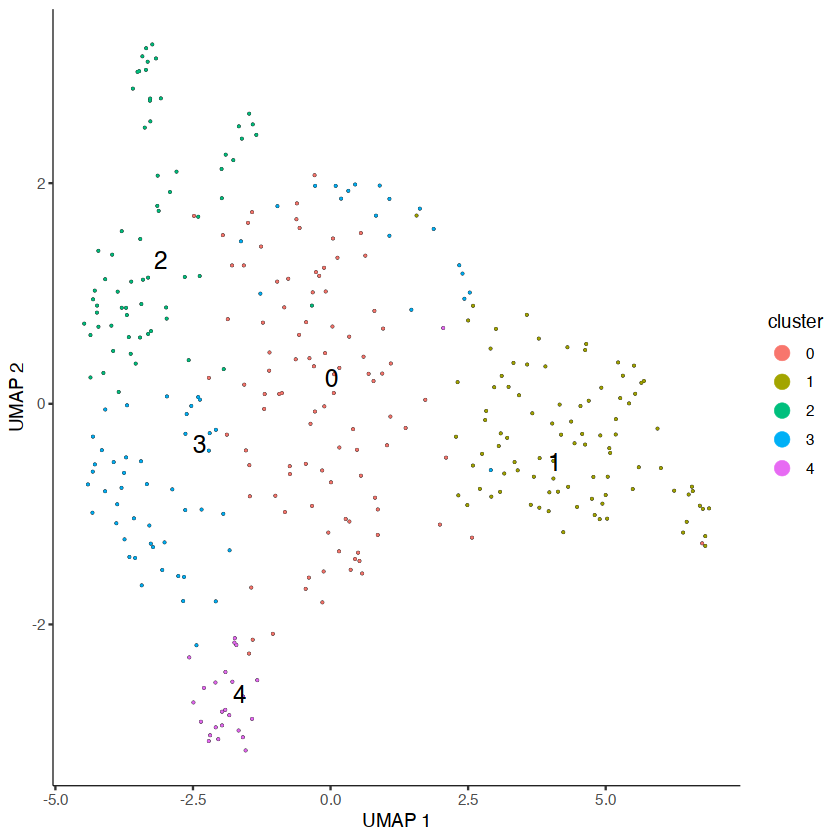

In [63]:
cluster.before.traj

In [64]:
cds <- learn_graph(cds, use_partition = F)

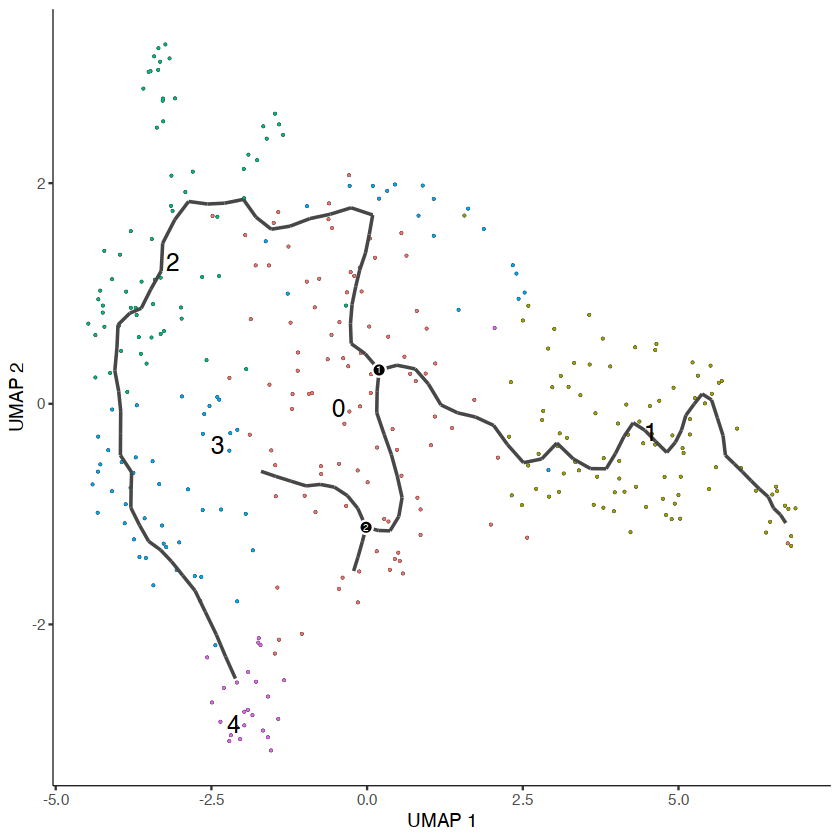

In [65]:
plot_cells(cds, color_cells_by = "cluster", label_groups_by_cluster = F,
           label_branch_points = T, label_roots = T, label_leaves = F,
           group_label_size = 5)

Cells aren't colored in a way that allows them to be grouped.



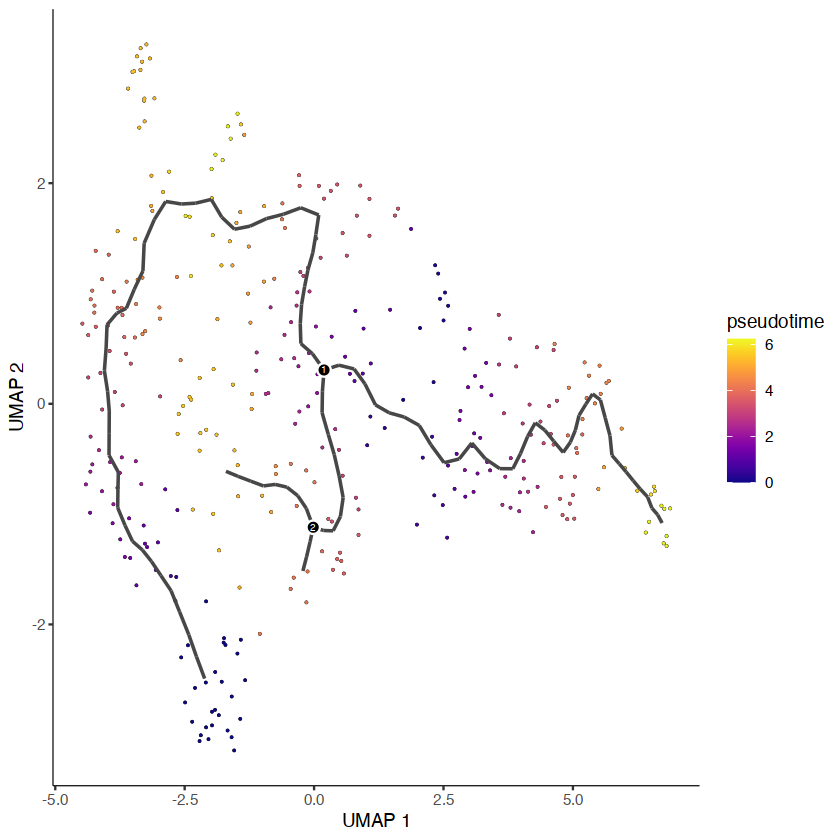

In [69]:
cds <- order_cells(cds, reduction_method = "UMAP", root_cells = colnames(cds[, clusters(cds) == 4]))
plot_cells(cds, color_cells_by = "pseudotime", label_groups_by_cluster = T,
           label_branch_points = T, label_roots = F, label_leaves = F)

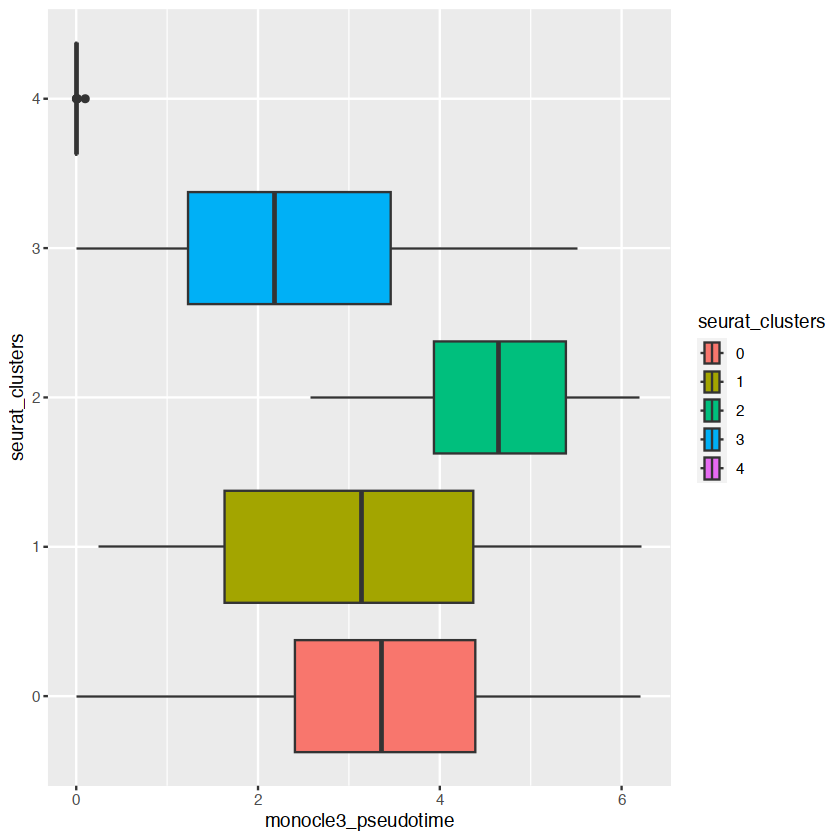

In [71]:
cds$monocle3_pseudotime <- pseudotime(cds)
data.pseudo <- as.data.frame(colData(cds))

ggplot(data.pseudo, aes(monocle3_pseudotime, seurat_clusters, fill = seurat_clusters)) + geom_boxplot()